# Mô hình đoán cân nặng dựa vào chiều cao

## Dữ liệu huấn luyện

| Chiều cao (cm) | Cân nặng (kg) | Chiều cao (cm) | Cân nặng (kg) |
|----------------|---------------|----------------|---------------|
| 147            | 49            | 168            | 60            |
| 150            | 50            | 170            | 72            |
| 153            | 51            | 173            | 63            |
| 158            | 54            | 175            | 64            |
| 163            | 58            | 178            | 66            |
| 165            | 59            | 180            | 67            |
| 183            | 68            |                |               |

## Mô hình toán học

Đặt $x_i$ là chiều cao, $y_i$ là cân nặng tương ứng với $x_i$.

Ta thành lập một quan hệ tuyến tính giữa chiều cao $x_i$ và cân nặng dự đoán $\hat{y_i}$: $\hat{y_i} = ax_i + b.$

Ta cần tìm $(a, b)$ sao cho $$L(a, b) = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$ nhỏ nhất (Sai số giữa thực tế và dự đoán thấp nhất).

$$L(a, b) = (y_1 - \hat{y_1})^2 + (y_2 - \hat{y_2})^2 + ... + (y_n - \hat{y_n})^2$$
$$= (y_1^2 + y_2^2 + ... + y_n^2) + (\hat{y_1}^2 + \hat{y_2}^2 + ... + \hat{y_n}^2) - 2(y_1\hat{y_1} + 2y_2\hat{y_2} + ... + 2y_n\hat{y_n})$$
$$= (y_1^2 + y_2^2 + ... + y_n^2) + [(ax_1 + b)^2 + (ax_2 + b)^2 + ... + (ax_n + b)^2] - 2[y_1(ax_1 + b) + y_2(ax_2 + b) + ... + y_n(ax_n + b)]$$
$$= (y_1^2 + y_2^2 + ... + y_n^2) + [(ax_1)^2 + (ax_2)^2 + ... + (ax_n)^2] + 2(ax_{1}b + ax_{2}b + ... + ax_{n}b) + nb^2 - 2(y_1ax_1 + y_2ax_2 + ... + y_nax_n) - 2(y_1b + y_2b + ... + y_nb)$$
$$= \sum_{i=1}^{n} y_i^2 + a^2\sum_{i=1}^{n} x_i^2 + 2ab\sum_{i=1}^{n} x_i + nb^2 - 2a\sum_{i=1}^{n} x_iy_i - 2b\sum_{i=1}^{n} y_i $$

Đặt $X = \sum_{i=1}^{n} x_i$, $X_2 = \sum_{i=1}^{n} x_i^2$, $Y = \sum_{i=1}^{n} y_i$, $Y_2 = \sum_{i=1}^{n} y_i^2$, $Z = \sum_{i=1}^{n} x_iy_i$

Ta có
$$L(a, b) = Y_2 + a^2X_2 + 2abX + nb^2 - 2aZ - 2bY$$

Với $(x_i, y_i)$ từ tập dữ liệu huấn luận, ta có $L(a, b)$ là một hàm lồi.

![function.png](https://cdn.pbrd.co/images/GKYM91F.png)

Do đó ta có thể tìm $(a, b)$ để $L(a, b)$ đạt cực tiểu.

$$\frac{\partial L(a, b)}{\partial a} = 2aX_2 + 2bX - 2Z = 0 \leftrightarrow a = \frac{Z - bX}{X_2}$$

$$\frac{\partial L(a, b)}{\partial b} = 2aX + 2nb - 2Y = 0 \leftrightarrow b = \frac{Y - aX}{n} $$

Thế $a$ vào $b$ và ngược lại, ta được
$$a = \frac{nZ - XY}{nX_2 - X^2}$$
$$b = \frac{X_2Y - XZ}{nX_2 - X^2}$$

In [45]:
weightHeightPairs = list(zip([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183], [49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]))
n = len(weightHeightPairs)

X  = sum(map(lambda p: p[0], weightHeightPairs))
X2 = sum(map(lambda p: p[0]**2, weightHeightPairs))
Y  = sum(map(lambda p: p[1], weightHeightPairs))
Y2 = sum(map(lambda p: p[1]**2, weightHeightPairs))
Z  = sum(map(lambda p: p[0]*p[1], weightHeightPairs))

a = (n*Z - X*Y)/(n*X2 - X**2)
b = (X2*Y - Z*X)/(n*X2 - X**2)
(a, b)

(0.5592049619396673, -33.735410205807725)

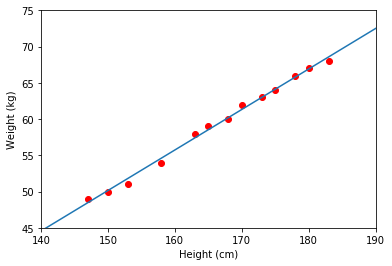

In [47]:
import matplotlib.pyplot as plt

plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

plt.plot(list(zip(*weightHeightPairs))[0], list(zip(*weightHeightPairs))[1], 'ro')

p0 = (0, b)
p1 = (190, 190*a + b)
plt.plot(*list(zip(p0, p1)))

plt.show()

## Dữ liệu kiểm tra
| Chiều cao (cm) | Cân nặng (kg) | Cân nặng dự đoán (cm) | Độ chính xác (%) |
|----------------|---------------|-----------------------|------------------|
| 155            | 52            | 52.94                 | 98.19            |
| 160            | 56            | 55.74                 | 99.53            |
|                |               |                       | Avg 98.86        |

In [54]:
w0, w1 = 155*a + b, 160*a + b
p0 = (1 - abs(52 - w0)/52)*100
p1 = (1 - abs(56 - w1)/56)*100

([(w0, p0), (w1, p1)], (p0 + p1)/2)

([(52.941358894840704, 98.18969443299864),
  (55.73738370453904, 99.531042329534)],
 98.86036838126631)